##Code for finding Attributes from an image



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_Engineer/labels.csv")


Finding the NULL values and replacing them using mode 

In [3]:
df.isnull().sum()

Image     0
Attr1    80
Attr2    91
Attr3    93
Attr4    94
dtype: int64

In [4]:
df['Attr1']=df['Attr1'].fillna(df['Attr1'].mode()[0])
df['Attr2']=df['Attr2'].fillna(df['Attr2'].mode()[0])
df['Attr3']=df['Attr3'].fillna(df['Attr3'].mode()[0])
df['Attr4']=df['Attr4'].fillna(df['Attr4'].mode()[0])

In [5]:
df.isnull().sum()

Image    0
Attr1    0
Attr2    0
Attr3    0
Attr4    0
dtype: int64

In [6]:
import keras.preprocessing.image as image
from google.colab.patches import cv2_imshow

In [7]:
import numpy as np
train_image = []
for i in (range(df.shape[0])):
    img = image.load_img('/content/drive/MyDrive/Colab Notebooks/ML_Engineer/images/'+
                         df['Image'][i],
                         target_size=(200,150,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    
X = np.array(train_image)

In [8]:
df.shape[0]

975

In [9]:
import numpy as np
y = np.array(df.drop(['Image'],axis=1))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.25)

In [ ]:
df

,Image,Attr1,Attr2,Attr3,Attr4
0,image_0.jpg,1.0,1.0,0.0,1.0
1,image_1.jpg,1.0,0.0,0.0,0.0
2,image_2.jpg,1.0,1.0,0.0,0.0
3,image_3.jpg,1.0,1.0,0.0,0.0
4,image_4.jpg,1.0,1.0,0.0,0.0
5,image_5.jpg,1.0,0.0,1.0,0.0


In [12]:
import tensorflow as tf
from keras import layers
from keras import preprocessing
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(200,150,3),
                   pooling='Max',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(4, activation='sigmoid'))
resnet_model.summary()


94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 71680)             0         
                                                                 
 dense (Dense)               (None, 512)               36700672  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                         

In [13]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='binary_crossentropy',metrics=['binary_accuracy'])

history = resnet_model.fit(train_X, train_y,batch_size=30,epochs=20,validation_data=(val_X, val_y))

score = resnet_model.evaluate(val_X, val_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
25/25 [==============================] - 117s 5s/step - loss: 0.4728 - binary_accuracy: 0.7798 - val_loss: 0.4452 - val_binary_accuracy: 0.7818
Epoch 2/20
25/25 [==============================] - 111s 4s/step - loss: 0.4371 - binary_accuracy: 0.8023 - val_loss: 0.4499 - val_binary_accuracy: 0.7982
Epoch 3/20
25/25 [==============================] - 113s 5s/step - loss: 0.4377 - binary_accuracy: 0.8051 - val_loss: 0.4646 - val_binary_accuracy: 0.7982
Epoch 4/20
25/25 [==============================] - 111s 4s/step - loss: 0.4315 - binary_accuracy: 0.8129 - val_loss: 0.4559 - val_binary_accuracy: 0.7992
Epoch 5/20
25/25 [==============================] - 111s 4s/step - loss: 0.4285 - binary_accuracy: 0.8126 - val_loss: 0.4482 - val_binary_accuracy: 0.7992
Epoch 6/20
25/25 [==============================] - 111s 4s/step - loss: 0.4302 - binary_accuracy: 0.8071 - val_loss: 0.4523 - val_binary_accuracy: 0.7961
Epoch 7/20
25/25 [==============================] - 111s 4s/step - los

Graph Model Accuracy 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

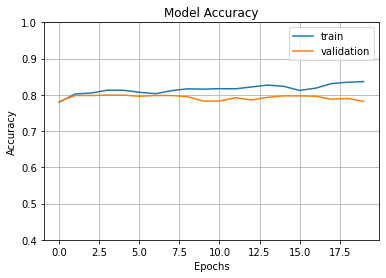

In [15]:
fig1 = plt.gcf()
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

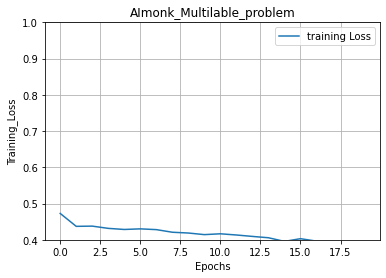

In [20]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('AImonk_Multilable_problem')
plt.ylabel('Training_Loss')
plt.xlabel('Epochs')
plt.legend(['training Loss'])
plt.show()

In [17]:
resnet_model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [18]:
from google.colab import files
files.download("my_model/saved_model.pb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Inference code 

In [19]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 200, 150

# load the model we saved
model = load_model('my_model')
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['binary_accuracy'])

# predicting images
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/ML_Engineer/test_image/image_2.jpg', target_size=(img_width, img_height, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255


predict_x=model.predict(x) 
print(predict_x)
y_pred = np.where(predict_x > 0.5, 1 , 0)
print(y_pred)





[[0.833567   0.854079   0.61857134 0.06481805]]
[[1 1 1 0]]
